# Исследование данных интернет-магазина «Стримчик»

    Интернет- магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.
    В ходе исследования выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. 

# Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Загрузка данных

### Библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Данные

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
%timeit data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

357 ms ± 54.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Предобработка данных

### Общая информация

In [4]:
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


- Заметим, что у столбца 'Year_of_release' тип данных float, но год выпуска это целое число, так что заменим его на int.
- Также у 'User_Score' тип данных object, хотя там хранятся дробные числа. Значит, нужно изменить тип данных на float.

### Приводим названия столбцов к нижнему регистру

In [5]:
data.columns = data.columns.str.lower()

### Проверка на дубликаты

In [6]:
data.duplicated().sum()

0

### Работа с пропусками и изменение типов данных

In [7]:
# считаем пропуски в столбце 'year_of_release'
data['year_of_release'].isna().sum()

269

In [8]:
# считаем процент пропусков от общего кол-ва строк
data['year_of_release'].isna().sum() / len(data['year_of_release'])

0.01609332934489979

In [9]:
# т.к. процент пропусков меньше двух (1.6%), то от них можно избавиться 
# а также для удобства привести к целому типу данных 'int'
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int32')

In [10]:
# в данных кроме NaN также есть значения неопределённости tbd (to be determined)
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# изменяем тип данных на float, а некорректные значения (tbd) принудительно заменяем на NaN
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [12]:
# считаем пропуски в столбце 'rating'
data['rating'].isna().sum()

6678

In [13]:
# т.к. тут категориальные данные, то пропуски заменим на 'unknown'
data['rating'] = data['rating'].fillna('unknown')

- Пропуски в других столбцах будет заменить не корректно, заполнив медианой или средним значением можно ошибиться и создать аномалии, так что пока оставим остальные пропуски без изменений.

                                ------------ Откуда пропуски? ------------
- Пропуски в столбце user_score могли появиться как от того, что они просто не захотели оценивать игры, а также потому что они ещё не достаточно времени провели в игре для оценки. В этом столбце были значения ('tbd' - to be determined), которые и подсказывают нам эту теорию.
- Пропуски в столбце 'critic_score' могут быть вызваны аналогичной причиной. Критики просто ещё в процессе оценивания.
- Пропуски в столбце 'rating' могут быть вызваны недостаточным количеством данных для присвоения категории т.е. без оценки критиков и пользователей категорию присвоить труднее. (Количество не нулевых строк в этих столбцах примерно одинаковое, так что теория крайне вероятна).

### Cуммарные продажи во всех регионах 

In [14]:
# создадим новый столбец 'revenue' с суммарными продажами
#data['revenue'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['revenue'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

## Исследовательский анализ данных

### Количество игр в разные годы

In [15]:
# общая информация по столбцу
data['year_of_release'].describe()

count    16446.000000
mean      2006.484616
std          5.877050
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

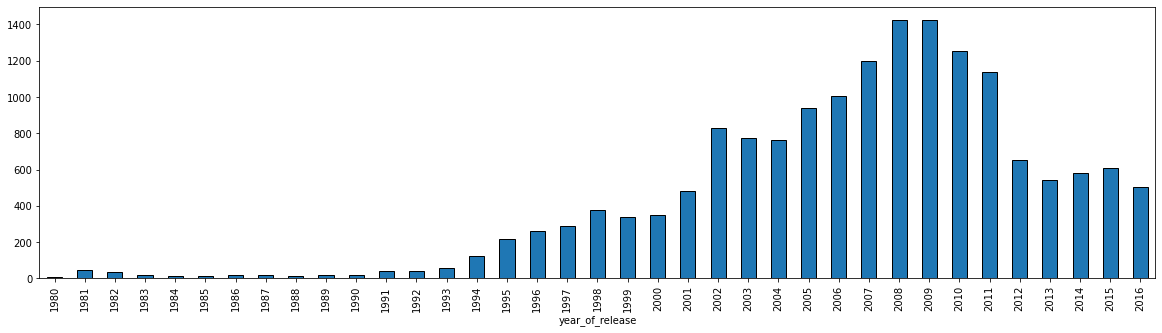

In [16]:
df = data.groupby('year_of_release')['name'].count()
plot = df.plot(kind='bar', y='name', figsize=(20, 5), ec='black')

- Пик приходится на 2008 — 2009 годы.
- Значительный рост количества игр начинается с 1994 года и продолжается до 2009 года, после чего идёт на спад, что связано с финансовым кризисом 2008 года. Акции компаний падали (например акции EA рухнули с 50 до 15 долларов), сотрудников увольняли, игровые компании банкротились.

### Суммарные продажи платформ

Text(0.5, 0, 'total_revenue')

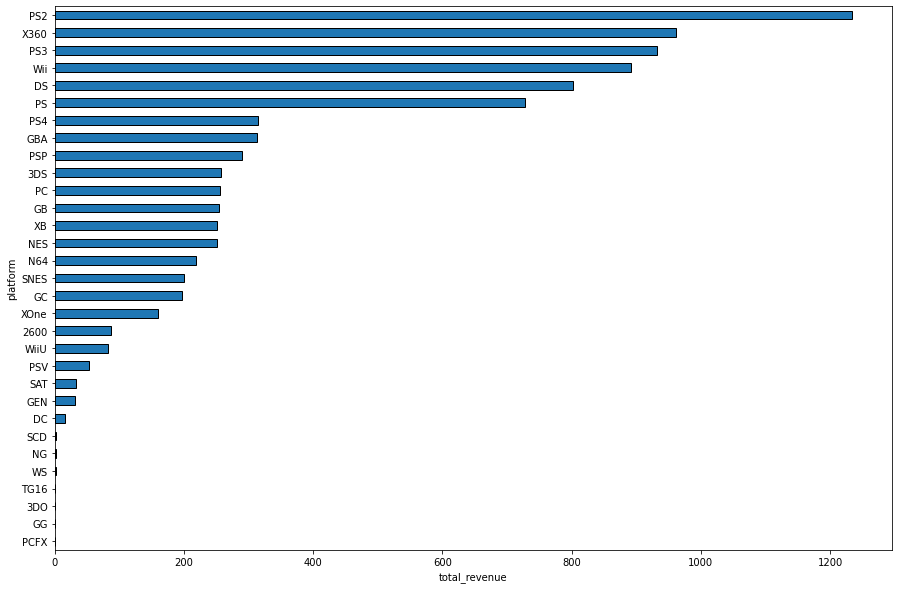

In [17]:
df = data.groupby('platform')['revenue'].sum().sort_values()
plot = df.plot(kind='barh', y='revenue', figsize=(15, 10), ec='black')
plt.xlabel('total_revenue')

- Лидирующуу место занимает PS2, но её продажи значительно выше следующей по популярности платформе так что возбмём топ-5 со второй по седьмую:'X360','PS3','Wii', 'DS', 'PS'

### Динамика продаж по топ 5 платформам

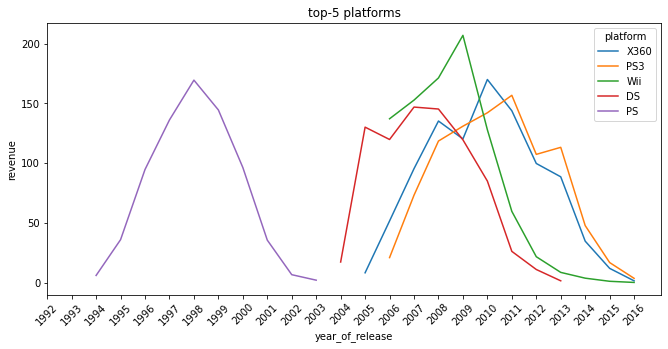

In [18]:
data_rev = data.query('year_of_release > 1991').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'revenue', 
    aggfunc = 'sum'
    )

data_rev = data_rev[['X360','PS3','Wii', 'DS', 'PS']]
ax = data_rev.plot(xticks=data_rev.index, figsize=(11,5))
plt.xticks(rotation = 45) 
ylab = ax.set_ylabel('revenue')
xlab = ax.set_xlabel('year_of_release')
plt.title('top-5 platforms')
plt.show()  

- Заметен общий тренд, что обычно платформы живут 10 лет

### Динамика продаж топовых платформ в актуальный период

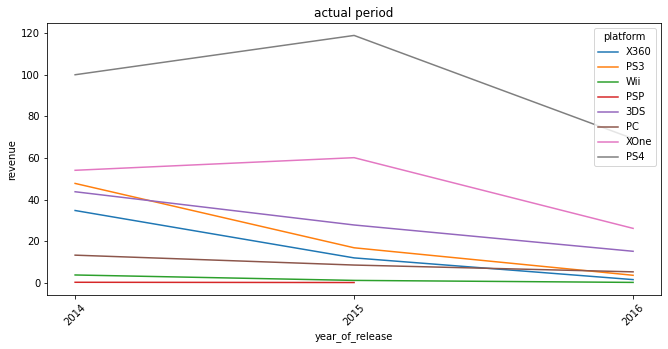

In [19]:
# примем начало актуального периода с 2014 года

data_rev = data.query('year_of_release > 2013').pivot_table(
    index = 'year_of_release', 
    columns = 'platform',
    values = 'revenue', 
    aggfunc = 'sum'
    )

data_rev = data_rev[['X360','PS3','Wii','PSP', '3DS', 'PC', 'XOne', 'PS4']]
ax = data_rev.plot(xticks=data_rev.index, figsize=(11,5))
plt.xticks(rotation = 45) 
ylab = ax.set_ylabel('revenue')
xlab = ax.set_xlabel('year_of_release')
plt.title('actual period')
plt.show() 

- Сразу бросаются в глаза 2 потенциально прибыльные платформы - "XOne" и "PS4". Но также стоит отметить "X360" и "PS3" их уровни продаж не сильно отстают от двух вышеупомянутых. "X360" и "PS3" будут держаться ещё какое-то время в топе как приближённые по характеристикам к флагманам как более дешёвые версии для тех кто не может себе позволить дорогую версию. Даже не смотря на то, что продажи всех платформ падают.

### Подготовим данные (избавимся от данных прошлых лет)

In [20]:
top_platforms = ['PS4','X360','PS3','XOne']
data_top = data.query('year_of_release >= 2014 and platform in @top_platforms')

### Строим ящики с усами

(0.0, 2.5)

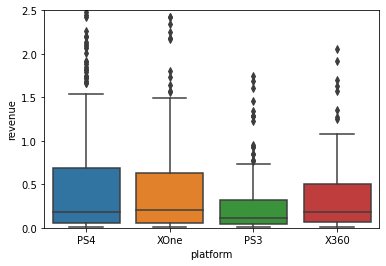

In [21]:
ax = sns.boxplot(x='platform', y='revenue', data=data_top)
ax.set_ylim(0, 2.5)

- Медианные значения всех платформ смещены к минимальным ~ 0.25 (только "X360" немного выше).
- Но у всех платформ много выбросов, что говорит об успехе отдельных игр, но тут "X360" уступает остальным и выбросами особо похвастаться не может.

### Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков 

In [22]:
data_top.query('platform == "PS4"')['revenue'].corr(data_top.query('platform == "PS4"')['user_score'])

-0.040131589472697356

- Можно сказать, что оценки пользователей не влияют на глобальную прибыль "PS4"

In [23]:
data_top.query('platform == "PS4"')['revenue'].corr(data_top.query('platform == "PS4"')['critic_score'])

0.40266141068104083

- Оценки критиков прямолинейно и достаточно сильно влияют на глобальную прибыль "PS4"

<AxesSubplot:xlabel='user_score'>

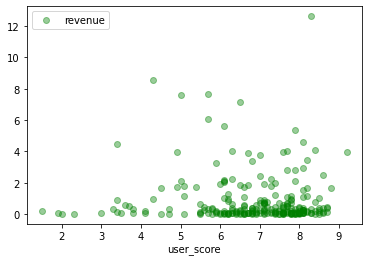

In [24]:
data_top.query('platform == "PS4"').plot(x='user_score', y='revenue', style='o', color='green', alpha=0.4)

<AxesSubplot:xlabel='critic_score'>

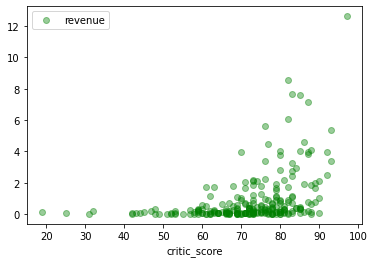

In [25]:
data_top.query('platform == "PS4"').plot(x='critic_score', y='revenue', style='o', color='green', alpha=0.4)


    Вывод: оценка критиков важна для прибыльности и оценки в основном от 55 до 85 баллов

### Проверим зависимость на остальных платформах

,revenue,critic_score,user_score
revenue,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


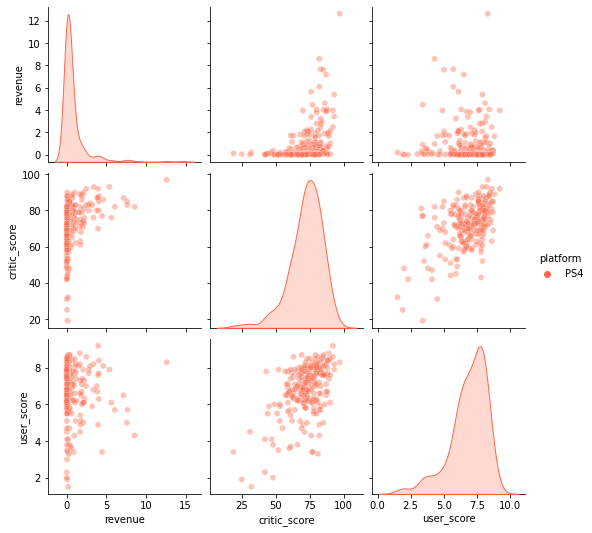

In [26]:
sns.pairplot(
    data_top.query('platform == "PS4"')[['revenue', 'critic_score', 'user_score', 'platform']],
    hue="platform",
    markers=["o"],
    palette='Reds',
    plot_kws={'alpha':0.4}
    )

display(data_top.query('platform == "PS4"')[['revenue', 'critic_score', 'user_score']].corr().style.background_gradient(cmap='Reds', axis=0))

,revenue,critic_score,user_score
revenue,1.000000,0.525723,-0.138445
critic_score,0.525723,1.000000,0.625309
user_score,-0.138445,0.625309,1.000000


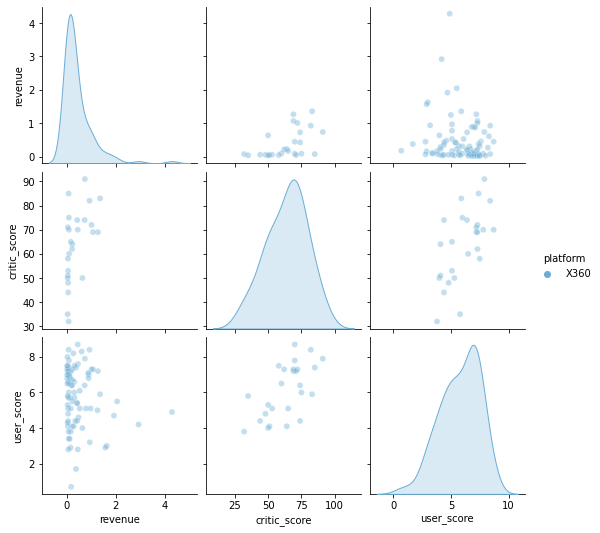

In [27]:
colors = ['Blues', 'Greens', 'Purples']
sns.pairplot(
    data_top.query('platform == @top_platforms[1]')[['revenue', 'critic_score', 'user_score', 'platform']],
    hue="platform",
    markers=["o"],
    palette=colors[0],
    plot_kws={'alpha':0.4})

display(data_top.query('platform == @top_platforms[1]')[['revenue', 'critic_score', 'user_score']].corr().style.background_gradient(cmap=colors[0], axis=0))

,revenue,critic_score,user_score
revenue,1.000000,0.446575,-0.166761
critic_score,0.446575,1.000000,0.693445
user_score,-0.166761,0.693445,1.000000


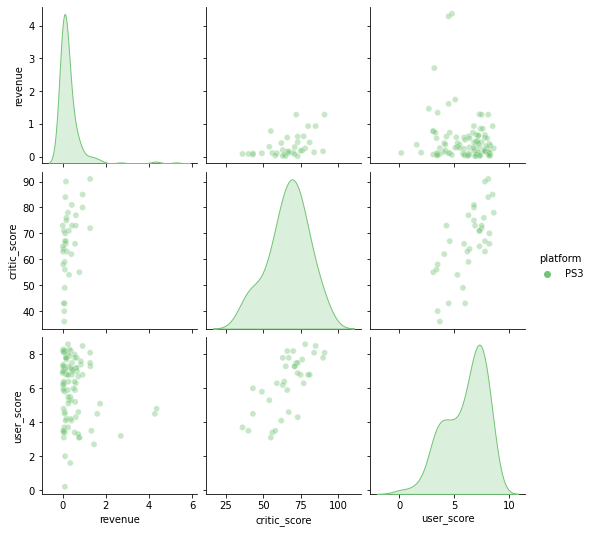

In [28]:
sns.pairplot(
    data_top.query('platform == @top_platforms[2]')[['revenue', 'critic_score', 'user_score', 'platform']],
    hue="platform",
    markers=["o"],
    palette=colors[1],
    plot_kws={'alpha':0.4})

display(data_top.query('platform == @top_platforms[2]')[['revenue', 'critic_score', 'user_score']].corr().style.background_gradient(cmap=colors[1], axis=0))

,revenue,critic_score,user_score
revenue,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


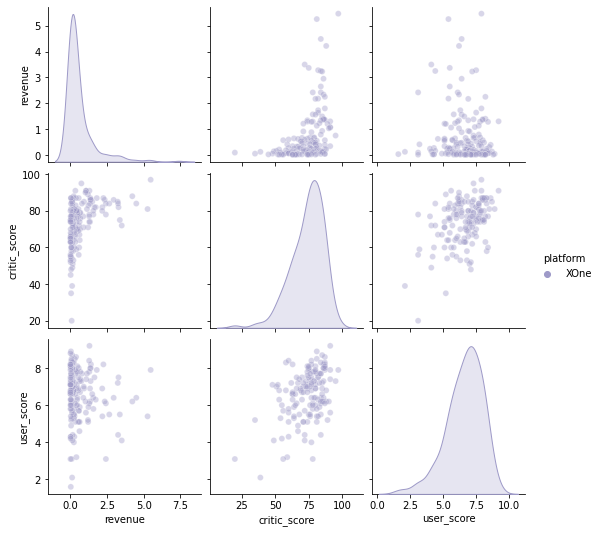

In [29]:
sns.pairplot(
    data_top.query('platform == @top_platforms[3]')[['revenue', 'critic_score', 'user_score', 'platform']],
    hue="platform",
    markers=["o"],
    palette=colors[2],
    plot_kws={'alpha':0.4})

display(data_top.query('platform == @top_platforms[3]')[['revenue', 'critic_score', 'user_score']].corr().style.background_gradient(cmap=colors[2], axis=0))

- Прибыльность всех топовых платформ примерно одинаково сильно зависит от критиков
- Оценки критиков и пользователей в свою очередь сильно зависят друг от друга
- Интервал самых распространённых оценок везде примерно одинаковый (55 - 85 баллов) и (5.5 и 8.5 баллов)

### Распределение игр по жанрам

In [30]:
data_top['genre'].value_counts()

Action          335
Sports          131
Shooter         103
Role-Playing     99
Adventure        74
Misc             55
Racing           52
Fighting         44
Platform         18
Simulation       13
Strategy          8
Puzzle            2
Name: genre, dtype: int64

In [31]:
# построим сводную таблицу прибыльности платформ по жанрам
piv = data_top.pivot_table(
    index = 'genre', 
    columns = 'platform',
    values = 'revenue', 
    aggfunc = 'sum'
    )

piv['total'] = piv[['PS3', 'PS4', 'X360', 'XOne']].sum(axis=1)     
display(piv.fillna(0).style.background_gradient(cmap='Blues', axis=0))

platform,PS3,PS4,X360,XOne,total
genre,,,,,
Action,18.100000,91.620000,12.330000,31.060000,153.110000
Adventure,1.980000,6.340000,1.900000,2.680000,12.900000
Fighting,2.890000,7.730000,0.660000,2.170000,13.450000
Misc,6.690000,7.770000,1.270000,6.740000,22.470000
Platform,0.760000,5.420000,0.190000,0.620000,6.990000
Puzzle,0.040000,0.020000,0.000000,0.000000,0.060000
Racing,1.000000,10.160000,1.640000,6.890000,19.690000
Role-Playing,6.630000,28.990000,2.760000,10.550000,48.930000
Shooter,12.170000,78.460000,13.660000,55.390000,159.680000


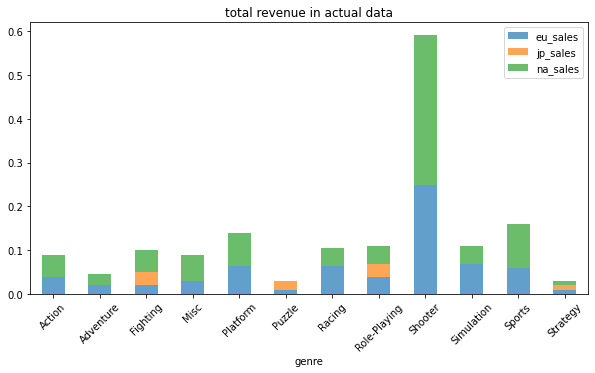

In [32]:
pivot = data_top.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')
pivot.plot(kind='bar', stacked=True, figsize=(10,5), alpha=0.7)
plt.xticks(rotation = 45) 
plt.title('total revenue in actual data')
plt.show()

- Самые прибыльный жанр в каждом из регионов: Shooter. Он сильно выделяется на фоне остальных (в несколько раз).
- Самые непопулярные: Adventure, Strategy, Puzzle (они сильно меньше остальных).

## Портрет пользователя каждого региона

### Топ платформ по регионам

In [33]:
pivot_na = data.query('year_of_release >= 2014').pivot_table(index='platform', values='na_sales', aggfunc='sum') \
                .nlargest(5, 'na_sales') \
                .apply(lambda col: col / col.sum(), axis=0) 
pivot_eu = data.query('year_of_release >= 2014').pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
                .nlargest(5, 'eu_sales') \
                .apply(lambda col: col / col.sum(), axis=0) 
pivot_jp = data.query('year_of_release >= 2014').pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
                .nlargest(5, 'jp_sales') \
                .apply(lambda col: col / col.sum(), axis=0) 

In [34]:
# найдём топ платформ для каждого региона 
# т.к. они отличаются, то пропущенные значения заполним нулями
pivot_join = pivot_na.join([pivot_eu, pivot_jp], how='outer').apply(lambda col: col / col.sum(), axis=0) \
                .fillna(0).style.format("{:.1%}") \
                .background_gradient(cmap='Greens', axis=0)
pivot_join

,na_sales,eu_sales,jp_sales
platform,,,
PS4,39.0%,55.1%,16.3%
XOne,32.1%,19.6%,0.0%
X360,11.2%,0.0%,0.0%
3DS,9.0%,6.8%,47.9%
PS3,8.7%,10.8%,12.2%
PC,0.0%,7.6%,0.0%
PSV,0.0%,0.0%,15.7%
WiiU,0.0%,0.0%,7.9%


- У Северной Америки и Европы одинаковые топовые платформы, но у Запада лидирует X360 и PS4 (28% и 21.7%), а у Европы PS4 и PS3 (33.9% и 25.6%)
- В Японии сильно вырывается в топ 3DS (50.7%), второе место - PS3 (20.4%)

### Топ жанров по регионам

In [35]:
pivot_na = data.query('year_of_release >= 2014').pivot_table(index='genre', values='na_sales', aggfunc='sum') \
                .apply(lambda col: col / col.sum(), axis=0) 
pivot_eu = data.query('year_of_release >= 2014').pivot_table(index='genre', values='eu_sales', aggfunc='sum') \
                .apply(lambda col: col / col.sum(), axis=0) 
pivot_jp = data.query('year_of_release >= 2014').pivot_table(index='genre', values='jp_sales', aggfunc='sum') \
                .apply(lambda col: col / col.sum(), axis=0)

In [36]:
# найдём топ жанров для каждого региона 
# т.к. они отличаются, то пропущенные значения заполним нулями
pivot_join = pivot_na.join([pivot_eu, pivot_jp], how='outer').apply(lambda col: col / col.sum(), axis=0) \
                .fillna(0).style.format("{:.1%}") \
                .background_gradient(cmap='Greens', axis=0)
pivot_join

,na_sales,eu_sales,jp_sales
genre,,,
Action,25.5%,27.6%,31.8%
Adventure,2.0%,2.4%,3.9%
Fighting,4.4%,2.5%,6.8%
Misc,5.3%,4.8%,6.0%
Platform,2.4%,2.5%,2.9%
Puzzle,0.2%,0.2%,1.0%
Racing,3.1%,5.2%,1.9%
Role-Playing,11.8%,10.4%,33.5%
Shooter,27.8%,24.2%,5.2%


- В Северной Америке и Европе лидируют жанры Action (~ 30%-31%) и Shooter(~22.4% - 24.5%). Самый непопулярный жанр во всех регионах - PUzzle (менее 1%)
- В Японии лидируют Role-Playing(34%) и Action(27.4%).

### Влияние  рейтинга ESRB на продажи в отдельном регионе

In [37]:
data.query('year_of_release >= 2014').pivot_table(index='rating', \
                 values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
                .apply(lambda col: col / col.sum(), axis=0) \
                .style.format("{:.1%}") \
                .background_gradient(cmap='Purples', axis=0)

,eu_sales,jp_sales,na_sales
rating,,,
E,21.4%,9.6%,17.9%
E10+,9.7%,4.8%,11.7%
M,34.5%,8.6%,33.9%
T,12.6%,15.9%,13.7%
unknown,21.8%,61.1%,22.8%


- В Северной Америке и Европе преобладают игры рейтинга M('mature') т.е. игрокам минимум 17 лет. Также категория E ('everyone) т.е. без возрастных ограничений. Значит, игры с подростковым рейтингом и рейтингом для малышей уменьшают прибыльность. 
- В Японии используется другая рейтинговая система CERO (Computer Entertainment Rating Organization) и более 50% продаж зависит именно от неё. Зависимость от ESRB незначительна и примерна одинакова во всех категориях.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [38]:
# Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
# Альтернативная гипотеза: Средние пользовательские рейтинги платформфы Xbox One меньше PC 
display(data.query('platform in ["XOne", "PC"]').pivot_table(index='platform', values='user_score'))
alpha = 0.05

results = st.ttest_ind(data.query('platform == "XOne"')['user_score'].dropna(), \
                       data.query('platform == "PC"')['user_score'].dropna(), \
                       alternative = 'less')
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

,user_score
platform,
PC,7.065960
XOne,6.521429


p-value: 6.518989810074553e-06
Отвергаем нулевую гипотезу


- Значит, средние пользовательские рейтинги платформфы Xbox One значительно меньше PC 

### Средние пользовательские рейтинги жанров Action  и Sports разные

In [39]:
# Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
# Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные
display(data.query('genre in ["Action", "Sports"]').pivot_table(index='genre', values='user_score'))
alpha = 0.05

results = st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(), \
                       data.query('genre == "Sports"')['user_score'].dropna(), \
                       equal_var=False)
print(f'p-value: {results.pvalue}')

# проверяем p-value
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

,user_score
genre,
Action,7.058129
Sports,6.951434


p-value: 0.07370217419278526
Нет оснований отвергнуть нулевую гипотезу


Значит, средние пользовательские рейтинги жанров Action и Sports одинаковые

## Общий вывод

#### Что сделали с данными
- В ходе исследования привели названия столцов нижнему регистру
- Удалили пропуски в столбце 'year_of_release'
- Привели столбцы 'year_of_release' и 'user_score' к типу данных int и float соответственно
- Некорректные значения в столбце 'user_score' заменили на NaN, а в столбце 'rating' на 'unknown'
- Добавили столбец 'revenue' с общими продажами во всех регионах
- Выяснили, что обычно платформа живёт 10 лет
#### Что выяснили
- Выявили 4 потенциально прибыльные платформы на 2017 год: 'PS4','X360','PS3','XOne'
- Прибыльность всех топовых платформ примерно одинаково сильно зависит от критиков
- Оценки критиков и пользователей в свою очередь сильно зависят друг от друга
- Интервал самых распространённых оценок везде примерно одинаковый (55 - 85 баллов) и (5.5 и 8.5 баллов)
- Самые прибыльный жанр в каждом из регионов: Shooter. Он сильно выделяется на фоне остальных (в несколько раз).
- Самые непопулярные: Adventure, Strategy, Puzzle (они сильно меньше остальных).
#### Портрет пользователя по регионам
- У Северной Америки и Европы одинаковые топовые платформы, но у Запада лидирует X360 и PS4 (28% и 21.7%), а у Европы PS4 и PS3 (33.9% и 25.6%)
- В Японии сильно вырывается в топ 3DS (50.7%), второе место - PS3 (20.4%)
- В Северной Америке и Европе лидируют жанры Action (~ 30%-31%) и Shooter(~22.4% - 24.5%). Самый непопулярный жанр во всех регионах - PUzzle (менее 1%)
- В Японии лидируют Role-Playing(34%) и Action(27.4%).
- В Северной Америке и Европе преобладают игры рейтинга M('mature') т.е. игрокам минимум 17 лет. Также категория E ('everyone) т.е. без возрастных ограничений. Значит, игры с подростковым рейтингом и рейтингом для малышей уменьшают прибыльность. 
- В Японии используется другая рейтинговая система CERO (Computer Entertainment Rating Organization) и более 50% продаж зависит именно от неё. Зависимость от ESRB незначительна и примерна одинакова во всех категориях.
#### Средние пользовательские рейтинги
- Средние пользовательские рейтинги платформфы Xbox One значительно меньше PC
- Средние пользовательские рейтинги жанров Action и Sports одинаковые